# 3.8 Comparison of Importance Sampling Methods - Figures

In [1]:
library(here)
source(here("setup.R"))

df_are_mu <- read_csv(here("data/figures/are_mu.csv"))
df_are_sigma2 <- read_csv(here("data/figures/are_sigma2.csv"))

df_rho_ce_sigma2 <- read_csv(here("data/figures/rho_cem_sigma2.csv"))
df_rho_eis_sigma2 <- read_csv(here("data/figures/rho_eis_sigma2.csv"))
df_rho_mu <- read_csv(here("data/figures/rho_mu.csv"))

rename_scenario <- function(df) {
    df %>% rename(
        "$\\mathcal N (0, 1)$" = 2,
        "loc. mixture, $\\omega^2 = 0.1$" = 3,
        "loc. mixture, $\\omega^2= 0.5$" = 4,
        "loc. mixture, $\\omega^2 = 1$" = 5,
        "scale mixture, $\\varepsilon^2 = 100$" = 6,
        "scale mixture, $\\varepsilon^2 = 10$" = 7,
        "scale mixture, $\\varepsilon^2 = 2$" = 8
    )
}

add_type <- function(df) {
    df %>%
        mutate(type_short = str_sub(name, 1, 3)) %>%
        mutate(type = case_when(
            type_short == "$\\m" ~ "normal",
            type_short == "loc" ~ "location mixture",
            type_short == "sca" ~ "scale mixture"
        )) %>%
        mutate(type = factor(type, levels = c("normal", "location mixture", "scale mixture")))
}


here() starts at /Users/stefan/workspace/work/phd/thesis



## `tikz/are.tex`

Warning message in scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{", -2:2, :
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{", -2:2, :
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{", -2:2, :
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{", -2:2, :
“log-10 transformation introduced infinite values.”


pdf 
  2

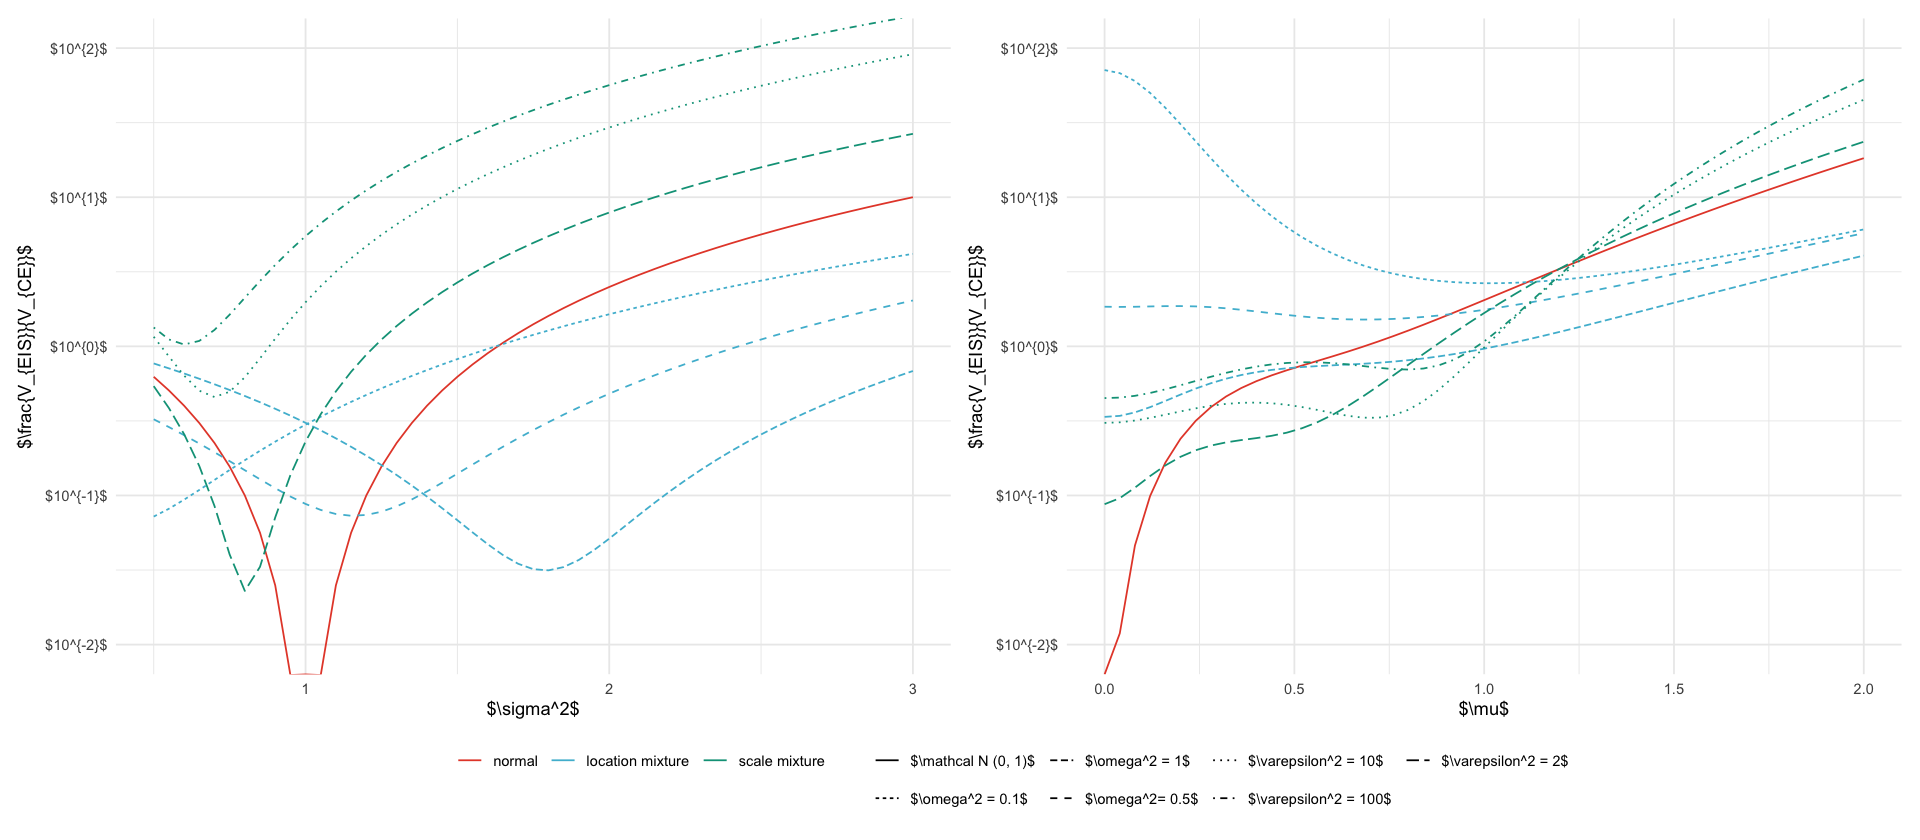

In [2]:
df_are_mu_fig <- df_are_mu %>%
    rename_scenario() %>%
    pivot_longer(-sigma2) %>%
    add_type()

df_are_sigma2_fig <- df_are_sigma2 %>%
    rename_scenario() %>%
    pivot_longer(-mu) %>%
    add_type()


plt_mu <- df_are_mu_fig %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    ggplot(aes(sigma2, value, linetype = name, color = type)) +
    geom_line() +
    coord_cartesian(ylim = c(1e-2, 1e2)) +
    scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{", -2:2, "}$")) +
    scale_linetype_discrete(name = "") +
    scale_color_discrete(name = "") +
    labs(x = "$\\sigma^2$", y = "$\\frac{V_{EIS}}{V_{CE}}$")

plt_sigma2 <- df_are_sigma2_fig %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    ggplot(aes(mu, value, linetype = name, color = type)) +
    geom_line() +
    coord_cartesian(ylim = c(1e-2, 1e2)) +
    scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{", -2:2, "}$")) +
    scale_linetype_discrete(name = "") +
    scale_color_discrete(name = "") +
    labs(x = "$\\mu$", y = "$\\frac{V_{EIS}}{V_{CE}}$")

(plt_mu | plt_sigma2) + plot_layout(guides = "collect") &
    theme(legend.position = "bottom")

ggsave_tikz(here("tikz/are.tex"))


## `tikz/rho.tex`

Joining with `by = join_by(mu, name, type_short, type)`
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


pdf 
  2

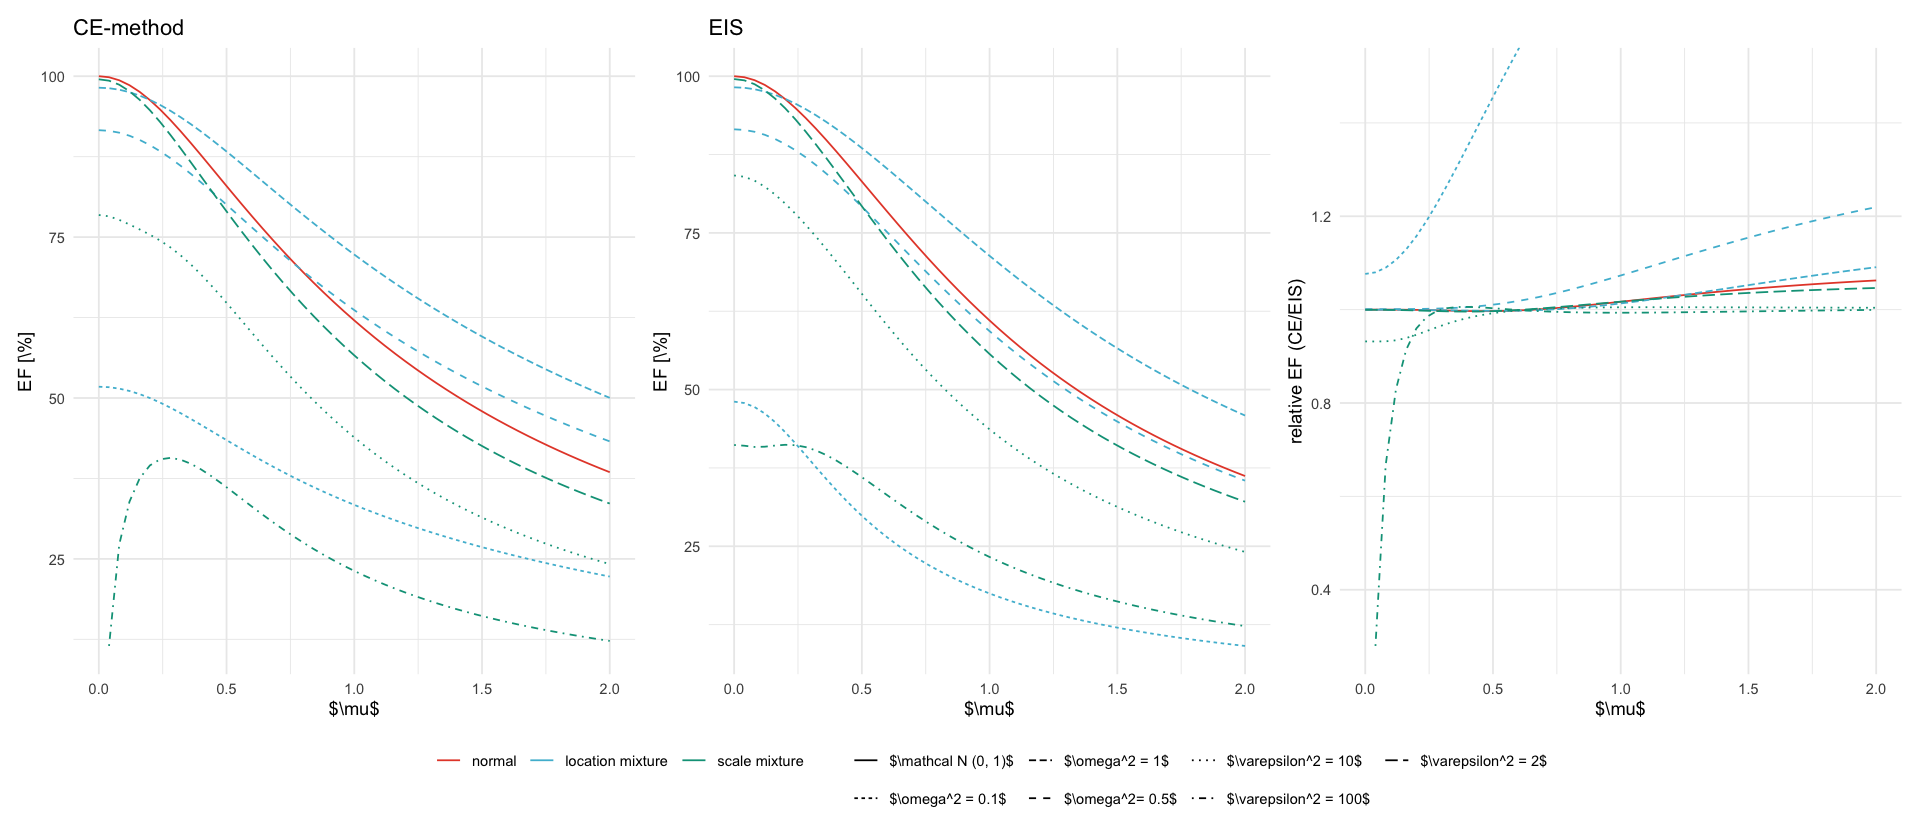

In [3]:
df_rho_ce_fig <- df_rho_ce_sigma2 %>%
    rename_scenario() %>%
    pivot_longer(-mu) %>%
    add_type() %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    rename("rho" = value) %>%
    mutate("EF" = 1 / rho * 100)
df_rho_eis_fig <- df_rho_eis_sigma2 %>%
    rename_scenario() %>%
    pivot_longer(-mu) %>%
    add_type() %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    rename("rho" = value) %>%
    mutate("EF" = 1 / rho * 100)

scales_fig <- list(
    scale_linetype_discrete(name = ""),
    scale_color_discrete(name = "")
)


p1 <- df_rho_ce_fig %>%
    ggplot(aes(mu, EF, color = type, linetype = name)) +
    geom_line() +
    labs(x = "$\\mu$", y = "EF [\\%]") +
    scales_fig +
    ggtitle("CE-method")
p2 <- df_rho_eis_fig %>%
    ggplot(aes(mu, EF, color = type, linetype = name)) +
    geom_line() +
    labs(x = "$\\mu$", y = "EF [\\%]") +
    scales_fig +
    ggtitle("EIS")

p3 <- select(rename(df_rho_ce_fig, "CE" = "EF"), -rho) %>%
    inner_join(select(rename(df_rho_eis_fig, "EIS" = "EF"), -rho)) %>%
    mutate(`relative EF` = CE / EIS) %>%
    ggplot(aes(mu, `relative EF`, color = type, linetype = name)) +
    geom_line() +
    coord_cartesian(ylim = c(NA, 1.5)) +
    scales_fig +
    xlab("$\\mu$") +
    ylab("relative EF (CE/EIS)")


(p1 | p2 | p3) + plot_layout(guides = "collect") & theme(legend.position = "bottom")

ggsave_tikz(here("tikz/rho.tex"))


## `tikz/rho_mu.tex`

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_line()`).”


pdf 
  2

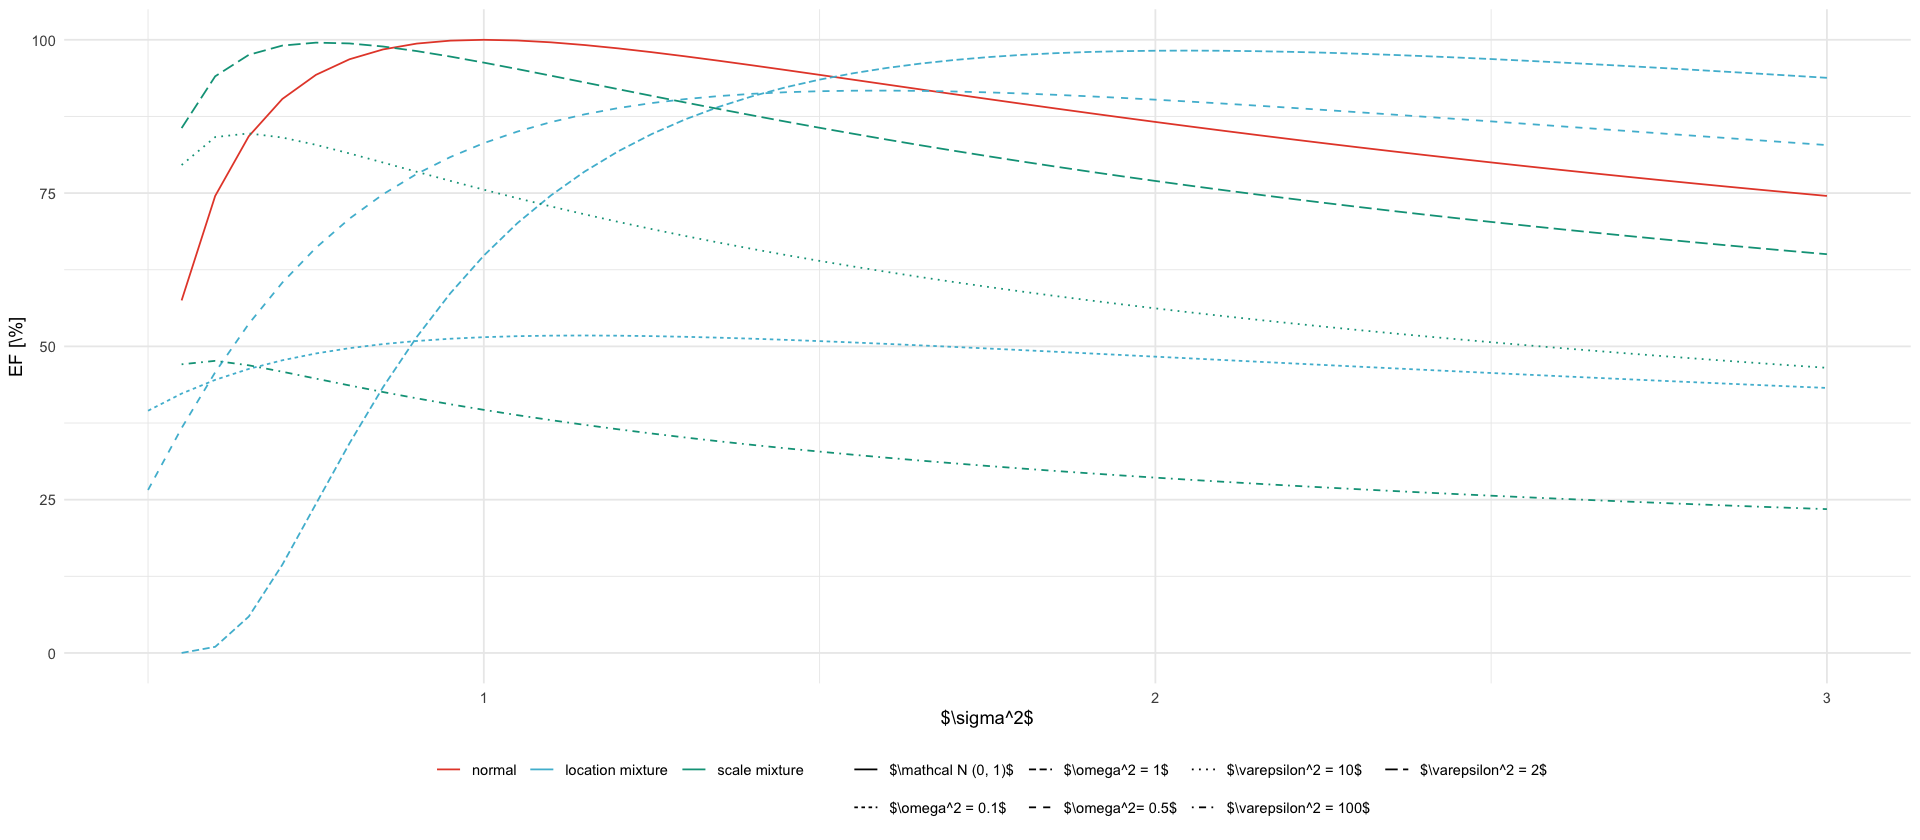

In [4]:
df_rho_mu %>%
    rename_scenario() %>%
    pivot_longer(-sigma2) %>%
    add_type() %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    rename("rho" = value) %>%
    mutate("EF" = 1 / rho * 100) %>%
    ggplot(aes(sigma2, EF, color = type, linetype = name)) +
    geom_line() +
    labs(x = "$\\sigma^2$", y = "EF [\\%]") +
    scale_color_discrete(name = "") +
    scale_linetype_discrete(name = "") +
    theme(legend.position = "bottom")

ggsave_tikz(here("tikz/rho_mu.tex"))


## `tikz/cem_eis_sigma2.tex`

pdf 
  2

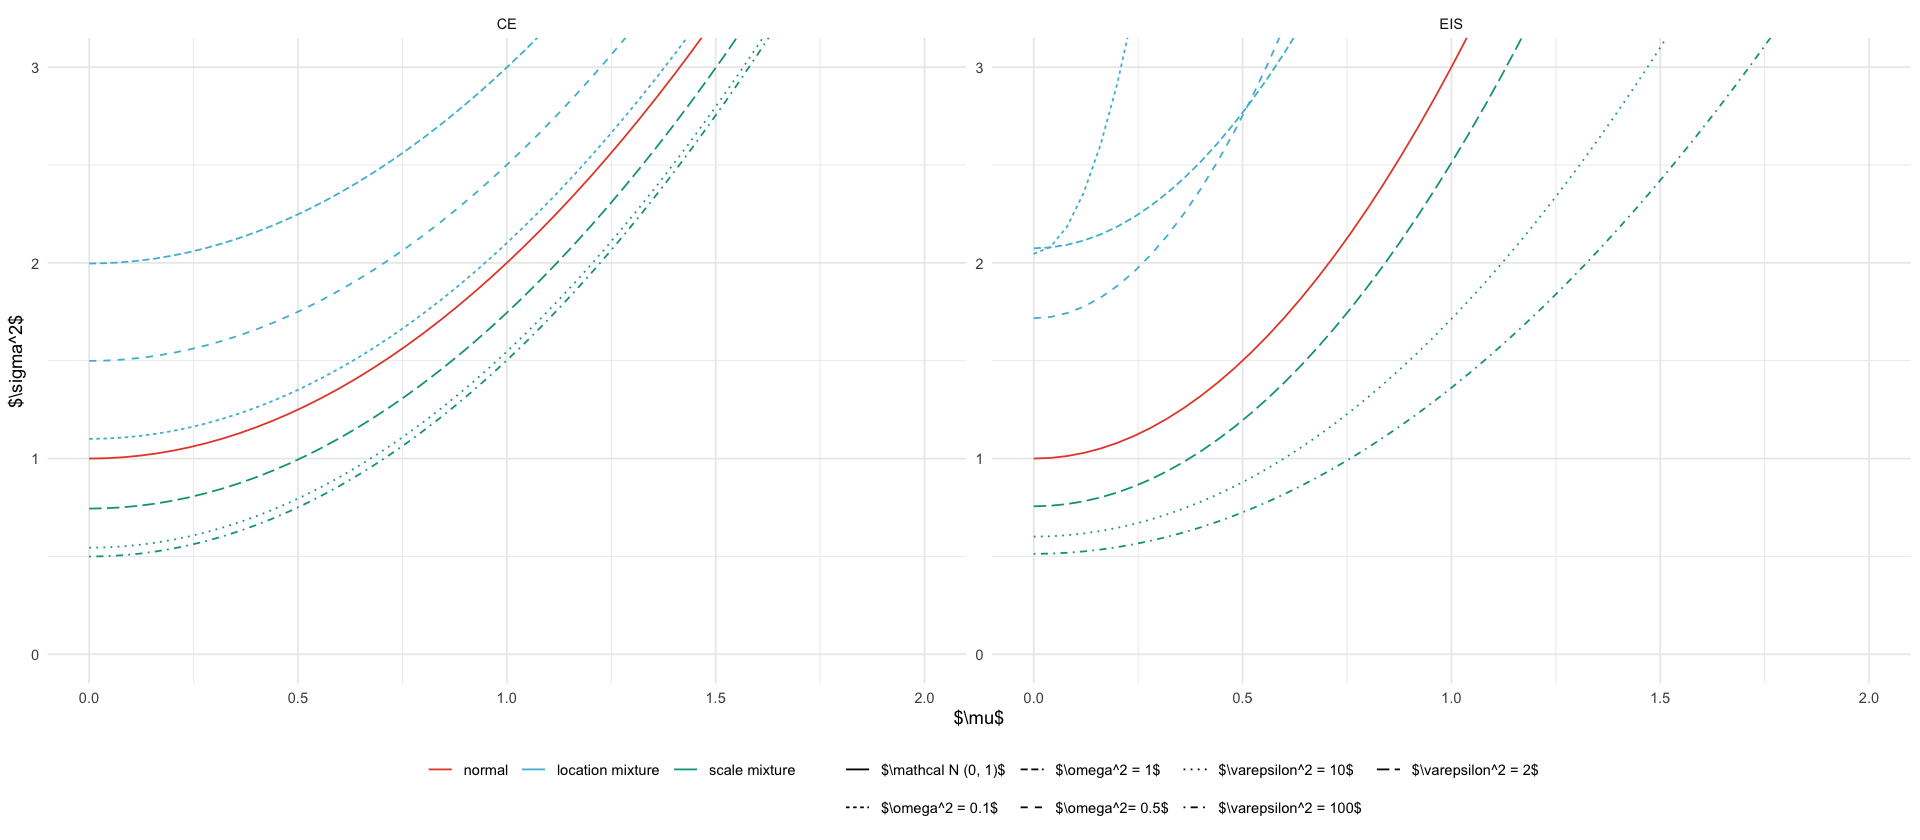

In [5]:
cem_sigma2 <- read_csv(here("data/figures/cem_sigma2.csv")) %>%
    rename_scenario() %>%
    pivot_longer(-mu) %>%
    add_type() %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    rename(sigma2 = value) %>%
    mutate(method = "CE")

eis_sigma2 <- read_csv(here("data/figures/eis_sigma2.csv")) %>%
    rename_scenario() %>%
    pivot_longer(-mu) %>%
    add_type() %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    rename(sigma2 = value) %>%
    mutate(method = "EIS")

cem_sigma2 %>%
    rbind(eis_sigma2) %>%
    ggplot(aes(mu, sigma2, color = type, linetype = name)) +
    geom_line() +
    facet_wrap(~method, scales = "free_y") +
    coord_cartesian(ylim = c(0, 3)) +
    labs(x = "$\\mu$", y = "$\\sigma^2$") +
    scale_color_discrete(name = "") +
    scale_linetype_discrete(name = "") +
    theme(legend.position = "bottom")

ggsave_tikz(here("tikz/cem_eis_sigma2.tex"))


## `tikz/gssm_eps.tex`

Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_line()`).”


pdf 
  2

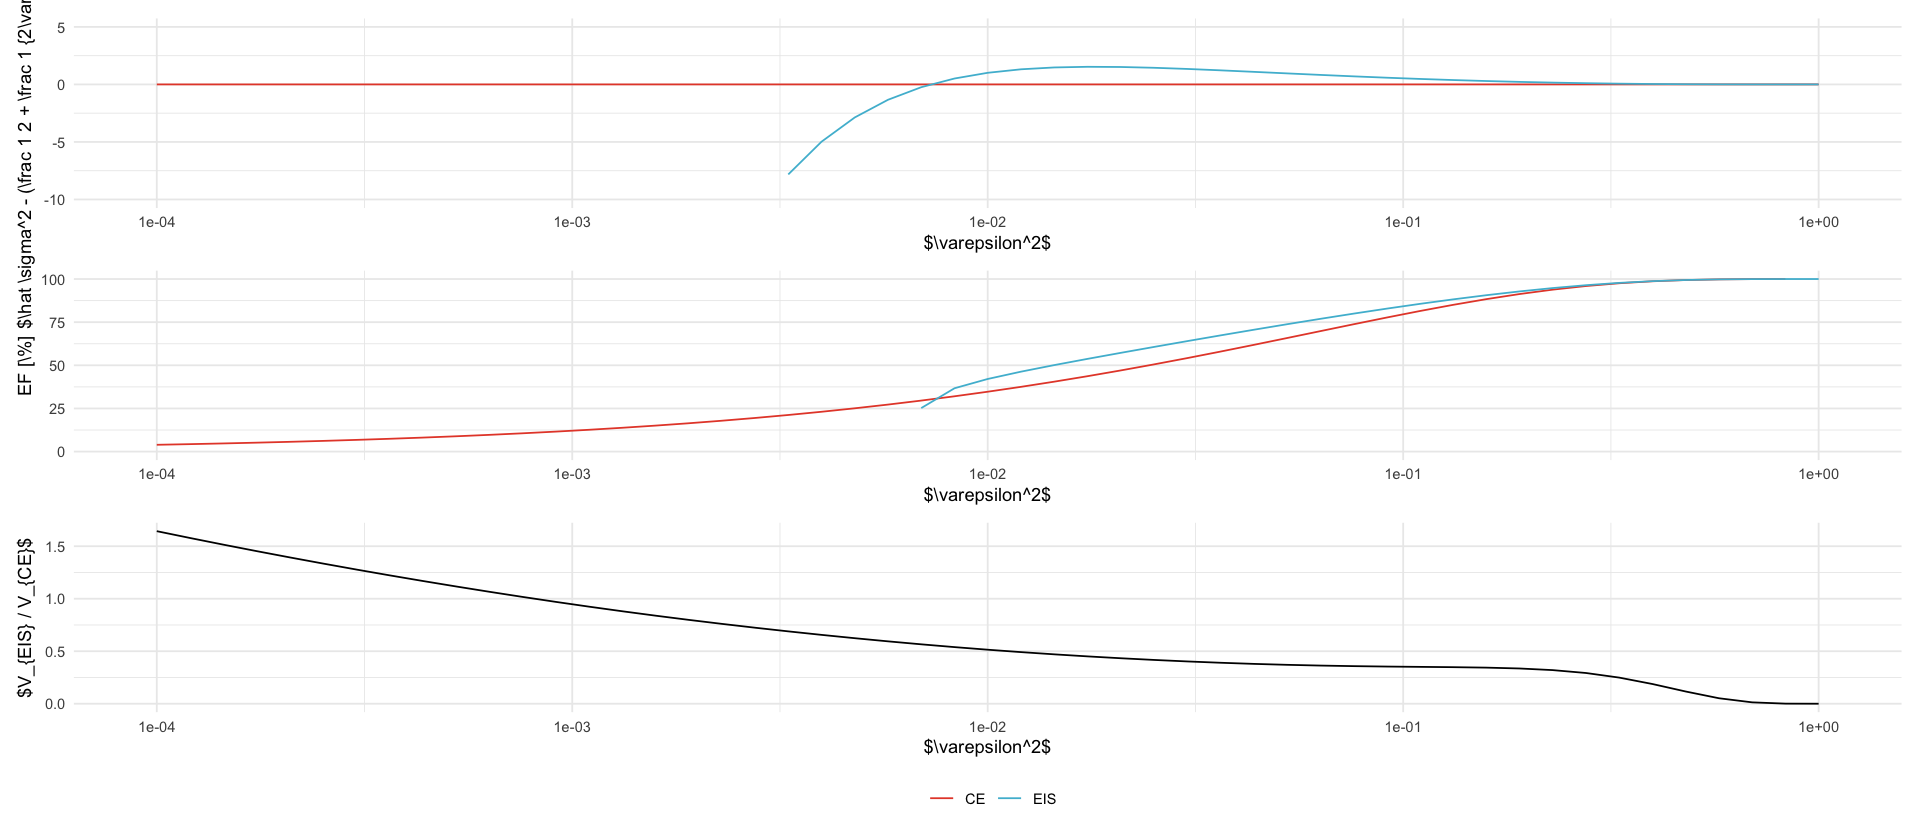

In [6]:
df_eps <- read_csv(here("data/figures/gsmm_eps.csv"))

p1 <- df_eps %>%
    select(epsilon, sigma2_cem, sigma2_eis) %>%
    pivot_longer(-epsilon, names_pattern = "sigma2_(.*)", values_to = "sigma2") %>%
    mutate(name = ifelse(name == "cem", "CE", "EIS")) %>%
    ggplot(aes(epsilon**2, sigma2 - (1 / 2 + 1 / 2 / epsilon**2), color = name)) +
    geom_line() +
    scale_x_log10() +
    # scale_y_log10() +
    scale_color_discrete(name = "") +
    labs(x = "$\\varepsilon^2$", y = "$\\hat \\sigma^2 - (\\frac 1 2 + \\frac 1 {2\\varepsilon^2})$") +
    ylim(-10, 5)

p2 <- df_eps %>%
    select(epsilon, starts_with("rho")) %>%
    pivot_longer(-epsilon, names_pattern = "rho_(.*)", values_to = "rho") %>%
    mutate(name = ifelse(name == "cem", "CE", "EIS")) %>%
    ggplot(aes(epsilon**2, 1 / rho * 100, color = name)) +
    geom_line() +
    scale_x_log10() +
    labs(x = "$\\varepsilon^2$", y = "EF [\\%]") +
    scale_color_discrete(name = "") +
    ylim(0, 100)

p3 <- df_eps %>%
    select(epsilon, are) %>%
    ggplot(aes(epsilon**2, are)) +
    geom_line() +
    scale_x_log10() +
    labs(x = "$\\varepsilon^2$", y = "$V_{EIS} / V_{CE}$") +
    theme(legend.position = "bottom")

(p1 / p2 / p3) + plot_layout(guides = "collect") & theme(legend.position = "bottom")
ggsave_tikz(here("tikz/gsmm_eps.tex"))


## `tikz/targets.tex`

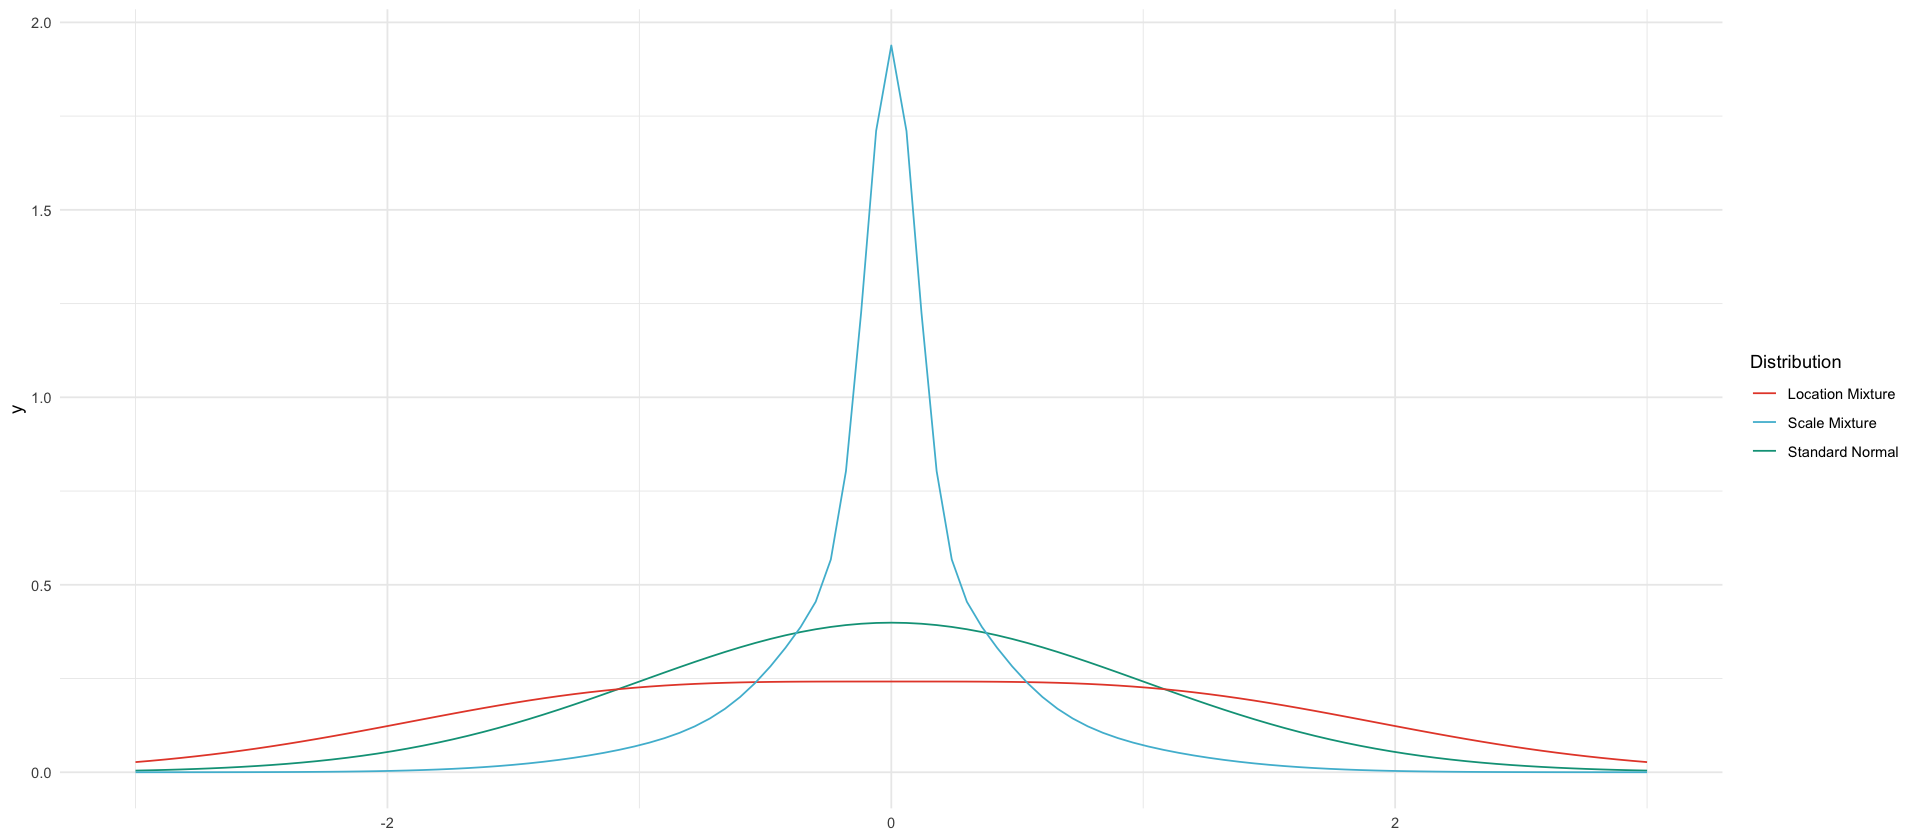

In [ ]:
# Define the location mixture function
location_mixture <- function(x, omega2) {
    0.5 * dnorm(x, mean = -1, sd = sqrt(omega2)) +
        0.5 * dnorm(x, mean = 1, sd = sqrt(omega2))
}

# Define the scale mixture function
scale_mixture <- function(x, eps2) {
    1 / 3 * dnorm(x, mean = 0, sd = sqrt(1 / 2)) +
        1 / 3 * dnorm(x, mean = 0, sd = sqrt(1 / 10)) +
        1 / 3 * dnorm(x, mean = 0, sd = sqrt(1 / 100))
}

# Plot the functions
ggplot() +
    geom_function(fun = dnorm, aes(color = "Standard Normal")) +
    geom_function(fun = location_mixture, aes(color = "Location Mixture")) +
    geom_function(fun = scale_mixture, aes(color = "Scale Mixture")) +
    xlim(-3, 3) +
    labs(color = "Distribution") +
    theme_minimal()
